# Google Play Store Market Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,root_mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor 

import joblib

In [6]:
df = pd.read_csv(r'Google-Playstore.csv')
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [8]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [9]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

### Duplicates

In [10]:
df.duplicated().sum()

0

no tenemos duplicados

### Missing Values

In [11]:
df.isnull().sum()

App Name                  5
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

Tenemos valores ausentes en diferentes columnas vamos a decidir que hacemos con estos datos. Podriamos eliminar alguna columna que pensemos no sera util para nuestro analisis o buscar maneras de remplazar los datos de ser necesario

In [12]:
# Combertimos estas columnas en booleanas ya que la informacion que proporcionan como tal no nos sirven. 
df[['Developer Website','Developer Email','Privacy Policy']] = df[['Developer Website','Developer Email','Privacy Policy']].applymap(
    lambda x: False if pd.isna(x) else True)


C:\Users\RYZEN\AppData\Local\Temp\ipykernel_19572\2380773379.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Developer Website','Developer Email','Privacy Policy']] = df[['Developer Website','Developer Email','Privacy Policy']].applymap(


In [13]:
df.isna().sum()

App Name                 5
App Id                   0
Category                 0
Rating               22883
Rating Count         22883
Installs               107
Minimum Installs       107
Maximum Installs         0
Free                     0
Price                    0
Currency               135
Size                   196
Minimum Android       6530
Developer Id            33
Developer Website        0
Developer Email          0
Released             71053
Last Updated             0
Content Rating           0
Privacy Policy           0
Ad Supported             0
In App Purchases         0
Editors Choice           0
Scraped Time             0
dtype: int64

In [14]:
# Eliminando columnas que no necesitemos
df.drop(['App Id', 'Scraped Time','Maximum Installs'],inplace=True,axis=1)
len(df)

2312944

In [15]:
# Eliminamos los valores nulos restantes
df.dropna(inplace=True)
len(df)

2235275

Podemos observar que despues de eliminar todos los valores ausentes nos hemos quedado con gran parte del dataset original

In [16]:
# Convirtiendo la columna con fechas en formato datetime
df.Released = pd.to_datetime(df['Released'])
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Released'].describe()

count                          2235275
mean     2018-08-29 01:28:05.096821760
min                2010-01-28 00:00:00
25%                2017-07-01 00:00:00
50%                2019-03-19 00:00:00
75%                2020-04-15 00:00:00
max                2021-06-16 00:00:00
Name: Released, dtype: object

Tenemos informacion desde el ano 2010 hasta el 2021. Para nuestro analisis nos vamos a enfocar en los ultimos 5 anos. Quiere decir de los anos 2016 al 2021.

In [17]:
# vemos la cantidad de datos con los que nos vamos a quedar
len(df[df['Released'].dt.year > 2016 ])

1794432

In [18]:
# Guardamos nuestro dataset con los ultimos 5 anos 
df = df[df['Released'].dt.year > 2016 ]

## Valores Unicos

In [19]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Free', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1794432 entries, 0 to 2312943
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   Category           object        
 2   Rating             float64       
 3   Rating Count       float64       
 4   Installs           object        
 5   Minimum Installs   float64       
 6   Free               bool          
 7   Price              float64       
 8   Currency           object        
 9   Size               object        
 10  Minimum Android    object        
 11  Developer Id       object        
 12  Developer Website  bool          
 13  Developer Email    bool          
 14  Released           datetime64[ns]
 15  Last Updated       datetime64[ns]
 16  Content Rating     object        
 17  Privacy Policy     bool          
 18  Ad Supported       bool          
 19  In App Purchases   bool          
 20  Editors Choice     bool      

### `category`

In [21]:
print(f'''
Numero de Categorias : {len(df.Category.value_counts())}
Conteo por Categorias: {df.Category.value_counts()}
''')


Numero de Categorias : 48
Conteo por Categorias: Category
Education                  192676
Music & Audio              130172
Entertainment              114655
Business                   110621
Tools                      107475
Books & Reference           87820
Lifestyle                   84551
Personalization             69218
Health & Fitness            66381
Food & Drink                65499
Shopping                    62358
Productivity                58377
Travel & Local              46702
Finance                     46541
Arcade                      42053
Casual                      38719
Communication               38039
Puzzle                      37582
Social                      36600
Sports                      33114
News & Magazines            28129
Photography                 27746
Medical                     22428
Action                      21514
Adventure                   18885
Simulation                  17962
Maps & Navigation           17773
Art & Design           

Tenemos en total 48 diferentes tipos de categorias entre todas nuestras applicaciones. 

<Axes: xlabel='Category', ylabel='count'>

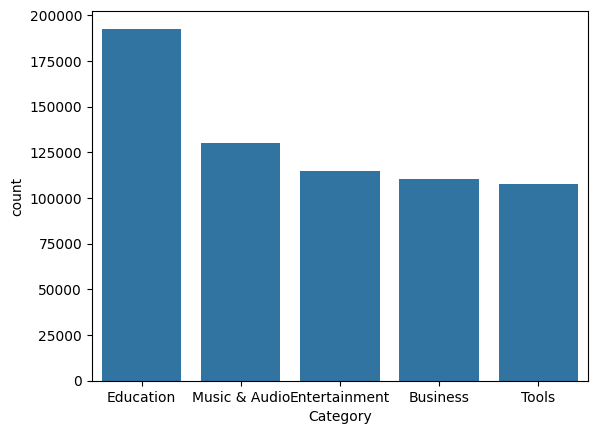

In [22]:
sns.barplot(df.Category.value_counts(ascending=False).head())

Aqui podemos observar las 5 categorias con mayor cantidad de apps en la play store. 

### `Rating`

In [23]:
print(f'''
Numero de Categorias : {len(df.Rating.value_counts())}
Conteo por Categorias: {df.Rating.value_counts()}
''')


Numero de Categorias : 42
Conteo por Categorias: Rating
0.0    931604
5.0     87056
4.4     59119
4.2     59100
4.3     56337
4.6     55726
4.5     53040
4.8     46987
4.1     45497
4.7     45154
4.0     44515
4.9     36291
3.9     36012
3.8     35231
3.7     28307
3.6     23748
3.5     20686
3.4     19426
3.3     14902
3.2     14371
3.0     11831
3.1     10280
2.8      8249
2.9      7616
2.6      6428
2.7      6218
2.5      4681
2.4      4060
2.3      3745
2.2      3388
2.0      2646
2.1      2504
1.8      2141
1.9      1767
1.7      1379
1.6      1180
1.5       833
1.4       733
1.0       621
1.3       436
1.2       411
1.1       176
Name: count, dtype: int64



Vemos que raiting es una variable continua con 42 valores que se repiten a lo largo de todo nuestro dataset. Esta es la calificacion que los usuarios le dan a una applicacion

### `Rating Count`

In [24]:
print(f'''
Numero de Categorias : {len(df['Rating Count'].value_counts())}
Conteo por Categorias: {df['Rating Count'].value_counts()}
''')


Numero de Categorias : 22481
Conteo por Categorias: Rating Count
0.0         931604
5.0          52066
6.0          43627
7.0          37413
8.0          32201
             ...  
512689.0         1
30793.0          1
65909.0          1
102597.0         1
78351.0          1
Name: count, Length: 22481, dtype: int64



### `free`

In [25]:
print(f'''
Numero de Categorias : {len(df.Free.value_counts())}
Conteo por Categorias: {df.Free.value_counts()}
''')


Numero de Categorias : 2
Conteo por Categorias: Free
True     1773132
False      21300
Name: count, dtype: int64



<Axes: xlabel='Free', ylabel='count'>

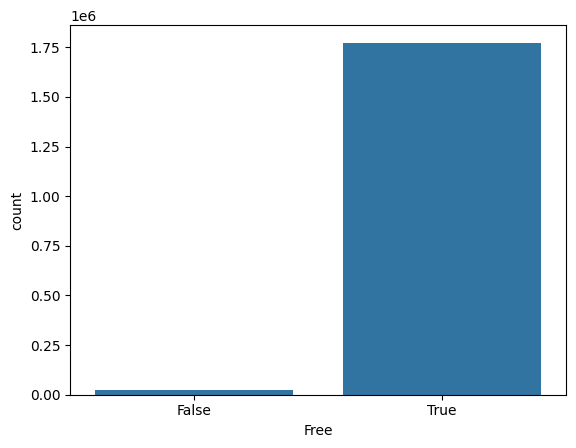

In [26]:
sns.barplot(df.Free.value_counts())

Podemos ver que la mayoria de las applicaciones que se encuentran en la play store son gratis y tan solo un porcentaje minimo son de paga. 

### `Size`

In [27]:
print(f'''
Numero de Categorias : {len(df.Size.value_counts())}
Conteo por Categorias: {df.Size.value_counts()}
''')


Numero de Categorias : 1596
Conteo por Categorias: Size
11M     50214
12M     43659
13M     38359
14M     35610
16M     34446
        ...  
353M        1
784M        1
868M        1
333M        1
512M        1
Name: count, Length: 1596, dtype: int64



Vemos que tenemos differentes tamanos de cada aplicacion. Necesitamos convertir esta columna en valores numericos que nos ayudara a realizar un mejor analisis a nuestros datos mas adelante. Ahora vamos a averiguar los differentes tamanos como kbytes mbytes, etc que podriamos tener aqui para saber como realizar la conversion. 

In [28]:
df.Size.unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [29]:
# decido crear un nuevo data frame y quedarme solamente con la ultima letra de los valores de esta columna para analizar que informacion tenemos
df_c = df.copy()
df_c['Size type'] = df_c['Size'].apply(lambda x: x[-1])
df_c['Size type'].value_counts()

Size type
M    1749162
e      32439
k      12821
G         10
Name: count, dtype: int64

vemos que tenemos Mbytes, Kbytes, Gbytes, y una variable que finaliza con e. Vamos a averiguar que nos dice esta variable

In [30]:
# Verificamos la informacion de los valores terminados en e
df_c[df_c['Size type'] == 'e']['Size']

137        Varies with device
140        Varies with device
154        Varies with device
180        Varies with device
182        Varies with device
                  ...        
2312632    Varies with device
2312651    Varies with device
2312677    Varies with device
2312738    Varies with device
2312745    Varies with device
Name: Size, Length: 32439, dtype: object

Vemos que tenemos un valor de "Varies with device". Esta informacion no nos va a ayudar en la creacion de nuestros modelos. Por lo tanto decido eliminar las columnas con "Varies with Device"

In [31]:
# Eliminamos las columnas 
df = df[df['Size'] != "Varies with device"]
len(df)

1761993

In [32]:
# Funcion para comvertir todo en megabytes
def to_megabytes(size):
    size = size.replace(',','') #remove commas 
    if "M"in size:
        return float(size.replace('M',''))
    elif "k" in size:
        return float(size.replace('k','')) / 1024 # convert kb to MB format
    elif 'G' in size:
        return float(size.replace('G','')) * 1024 # convert Gb to MB format
    else:
        return np.nan

In [33]:
# apply function to the column
df.Size = df.Size.apply(to_megabytes)
df.Size.info()

<class 'pandas.core.series.Series'>
Index: 1761993 entries, 0 to 2312943
Series name: Size
Non-Null Count    Dtype  
--------------    -----  
1761993 non-null  float64
dtypes: float64(1)
memory usage: 26.9 MB


Hemos logrado convertir todos nuestros datos en formato numerico y en Mbytes para nuestro analisis.

### `ad supported`

In [34]:
print(f'''
Numero de Categorias : {len(df['Ad Supported'].value_counts())}
Conteo por Categorias: {df['Ad Supported'].value_counts()}
''')


Numero de Categorias : 2
Conteo por Categorias: Ad Supported
True     909159
False    852834
Name: count, dtype: int64



<Axes: xlabel='Ad Supported', ylabel='count'>

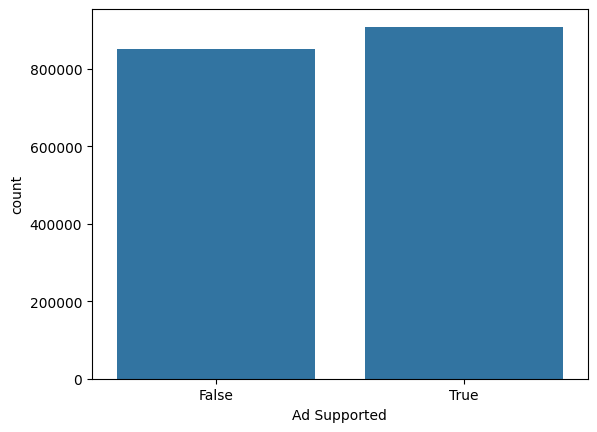

In [35]:
sns.barplot(df['Ad Supported'].value_counts())

Podemos obserbar que la mayoria de aplicaciones en nuestra play store estan apoyadas por anuncios. Sin embargo, en nuestro grafico podemos ver que la cantidad de apps soportadas por anuncions y aquellas no soportadas por anuncios es bastante pareja.

### `Currency`

In [36]:
print(f'''
Numero de Categorias : {len(df.Currency.value_counts())}
Conteo por Categorias: {df.Currency.value_counts()}
''')


Numero de Categorias : 13
Conteo por Categorias: Currency
USD    1760784
XXX       1187
EUR          5
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
SGD          1
AUD          1
ZAR          1
Name: count, dtype: int64



La mayoria de nuestros datos usan dolares como moneda. Vamos a eliminar los datos sobrantes

In [37]:
df = df[df['Currency'] == 'USD']
df.drop('Currency',inplace=True,axis=1)

### `Installs`

In [38]:
print(f'''
Numero de Categorias : {len(df.Installs.value_counts())}
Conteo por Categorias: {df.Installs.value_counts()}
''')


Numero de Categorias : 20
Conteo por Categorias: Installs
100+              361432
1,000+            296420
10+               266905
10,000+           168166
500+              146749
50+               146093
5,000+            101509
5+                 67131
1+                 59884
100,000+           58305
50,000+            43976
1,000,000+         15009
500,000+           13221
0+                 10686
5,000,000+          2646
10,000,000+         2270
50,000,000+          252
100,000,000+         116
500,000,000+           9
1,000,000,000+         5
Name: count, dtype: int64



Vemos que esta es una columna categorica que divide nuestras aplicaciones en secciones de acuerdo a la cantidad de instalaciones por aplicacion. No nos da una cantidad exacta de instalaciones por aplicacion. 

### `Minimum Android`

In [39]:
print(f'''
Numero de Categorias : {len(df['Minimum Android'].value_counts())}
Conteo por Categorias: {df['Minimum Android'].value_counts()}
''')


Numero de Categorias : 63
Conteo por Categorias: Minimum Android
4.1 and up      497174
5.0 and up      332666
4.4 and up      332206
4.0.3 and up    136058
4.2 and up       99259
                 ...  
4.1 - 5.0            1
4.1 - 4.3            1
4.1 - 7.0            1
2.0 - 8.0            1
4.0 - 7.0            1
Name: count, Length: 63, dtype: int64



Esta columna nos dice el tipo de android necesario para que esta aplicacion pueda ser instalada en un dispositivo. Tambien vamos a transformala a formato numerico para nuestro analisis.

In [40]:
df = df[df['Minimum Android'] != 'Varies with device']
len(df)

1759929

En esta columna tambien tenemos los valores "varies with device" y vamos a eliminarlos

In [41]:
def min_android(adroid):
    return float(adroid[:3])

In [42]:
# apply the function

df['Minimum Android'] = df['Minimum Android'].apply(min_android)
df['Minimum Android'].info()

<class 'pandas.core.series.Series'>
Index: 1759929 entries, 0 to 2312943
Series name: Minimum Android
Non-Null Count    Dtype  
--------------    -----  
1759929 non-null  float64
dtypes: float64(1)
memory usage: 26.9 MB


### `Content Rating`

In [43]:
print(f'''
Numero de Categorias : {len(df['Content Rating'].value_counts())}
Conteo por Categorias: {df['Content Rating'].value_counts()}
''')


Numero de Categorias : 6
Conteo por Categorias: Content Rating
Everyone           1532435
Teen                155095
Mature 17+           49487
Everyone 10+         22782
Adults only 18+        107
Unrated                 23
Name: count, dtype: int64



### `Editors Choice` 

In [44]:
print(f'''
Numero de Categorias : {len(df['Editors Choice'].value_counts())}
Conteo por Categorias: {df['Editors Choice'].value_counts()}
''')


Numero de Categorias : 2
Conteo por Categorias: Editors Choice
False    1759600
True         329
Name: count, dtype: int64



<Axes: xlabel='Category', ylabel='Minimum Installs'>

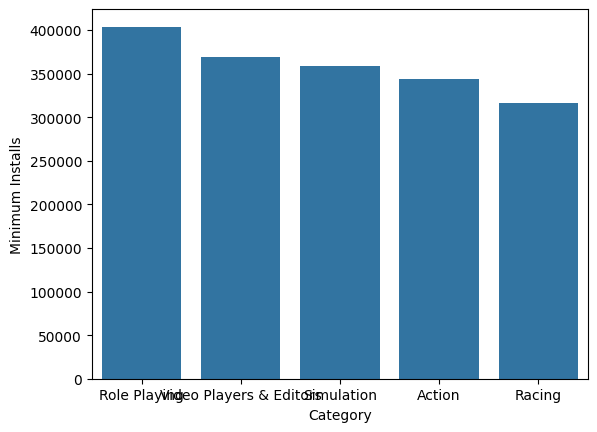

In [45]:
sns.barplot(df.groupby('Category')['Minimum Installs'].mean().sort_values(ascending=False).head())

## Time Series Analysis

In [46]:
time_series = df.groupby('Released')['App Name'].count()
time_series.index = pd.to_datetime(time_series.index)
time_series

Released
2017-01-01    291
2017-01-02    438
2017-01-03    585
2017-01-04    541
2017-01-05    591
             ... 
2021-06-12     42
2021-06-13     24
2021-06-14     42
2021-06-15     28
2021-06-16      1
Name: App Name, Length: 1628, dtype: int64

C:\Users\RYZEN\AppData\Local\Temp\ipykernel_19572\2236511635.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  decomposed = seasonal_decompose(time_series.resample('m').sum())


<Axes: xlabel='Released'>

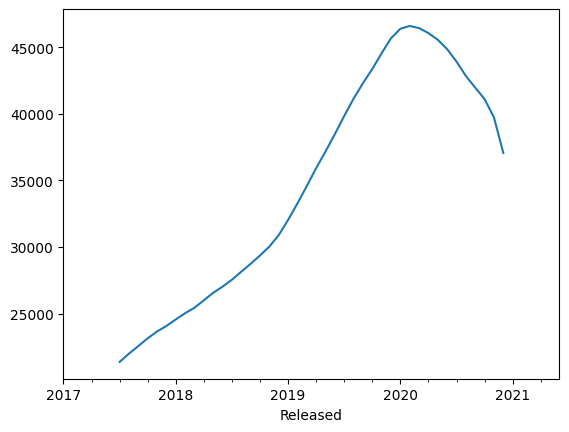

In [47]:
decomposed = seasonal_decompose(time_series.resample('m').sum())
decomposed.trend.plot(ax=plt.gca())


C:\Users\RYZEN\AppData\Local\Temp\ipykernel_19572\3034876087.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  decomposed = seasonal_decompose(time_series.resample('m').sum())


<Axes: xlabel='Released'>

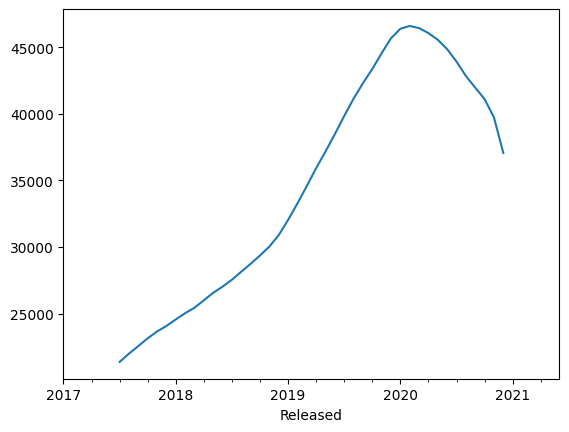

In [48]:
time_series = df.groupby('Released')['Minimum Installs'].count()
time_series.index = pd.to_datetime(time_series.index)
decomposed = seasonal_decompose(time_series.resample('m').sum())
decomposed.trend.plot(ax=plt.gca())

## ML Models

### Modelos sin variables categoricas

In [71]:
model_df_1 = df[['Rating', 'Minimum Installs', 'Free','Price','Size','Minimum Android','Ad Supported']].copy()

model_df_2 = df[['Category','Rating', 'Minimum Installs', 'Free','Price','Size','Minimum Android','Ad Supported']].copy()

In [72]:
model_df_1[['Free','Ad Supported']] = model_df_1[['Free','Ad Supported']].astype(int)
model_df_2[['Free','Ad Supported']] = model_df_2[['Free','Ad Supported']].astype(int)

model_df_1.head()

,Rating,Minimum Installs,Free,Price,Size,Minimum Android,Ad Supported
0,0.0,10.0,1,0.0,10.0,7.1,0
1,4.4,5000.0,1,0.0,2.9,5.0,1
2,0.0,50.0,1,0.0,3.7,4.0,0
3,5.0,10.0,1,0.0,1.8,4.0,1
4,0.0,100.0,1,0.0,6.2,4.1,0


In [73]:
len(df)

1759929

In [74]:
def train_val_test_split(df,rstate=42,shuffle=True,stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(df,test_size=0.4,random_state=rstate,shuffle=shuffle,stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set,test_set = train_test_split(test_set,test_size=0.5,random_state=rstate,shuffle=shuffle,stratify= strat)
    return (train_set,val_set,test_set)

In [75]:
def remove_labels(df,label_name):
    x = df.drop(label_name,axis=1)
    y = df[label_name].copy()
    return (x,y)

In [76]:
model_df_1 = model_df_1[model_df_1['Rating']>3]
model_df_2 = model_df_2[model_df_2['Rating']>3]

In [77]:
model_df_1, _ = train_test_split(model_df_1,test_size=0.5,random_state=42,shuffle=True,stratify=model_df_1['Rating'])
model_df_2, _ = train_test_split(model_df_2,test_size=0.5,random_state=42,shuffle=True,stratify=model_df_2['Rating'])

In [78]:
print(f'''
Df Only numeric: {len(model_df_1)}
Df categorical: {len(model_df_2)}
''')


Df Only numeric: 385414
Df categorical: 385414



In [79]:
train_set1,test_set1,val_set1 = train_val_test_split(model_df_1)
train_set2,test_set2,val_set2 = train_val_test_split(model_df_2)

In [80]:
print(f'''
Df Only numeric: {len(train_set1)}
Df categorical: {len(train_set2)}
''')


Df Only numeric: 231248
Df categorical: 231248



In [81]:
x_train1,y_train1 = remove_labels(train_set1,['Rating','Minimum Installs'])
x_test1,y_test1 = remove_labels(test_set1,['Rating','Minimum Installs'])
x_val1,y_val1 = remove_labels(val_set1,['Rating','Minimum Installs'])

x_train2,y_train2 = remove_labels(train_set2,['Rating','Minimum Installs'])
x_test2,y_test2 = remove_labels(test_set2,['Rating','Minimum Installs'])
x_val2,y_val2 = remove_labels(val_set2,['Rating','Minimum Installs'])

In [82]:
print(f'''
Df Only numeric: {x_train1.columns}
Df categorical: {x_train2.columns}
''')


Df Only numeric: Index(['Free', 'Price', 'Size', 'Minimum Android', 'Ad Supported'], dtype='object')
Df categorical: Index(['Category', 'Free', 'Price', 'Size', 'Minimum Android', 'Ad Supported'], dtype='object')



#### Linear Regression

In [83]:
scaler = RobustScaler()
scaled_features_train = scaler.fit_transform(x_train1)
scaled_x_train1 = pd.DataFrame(data=scaled_features_train,columns=x_train1.columns)

scaled_features_test = scaler.fit_transform(x_test1)
scaled_x_test1 = pd.DataFrame(data=scaled_features_test,columns=x_test1.columns)

In [84]:
lr_model = LinearRegression()
lr_model = MultiOutputRegressor(lr_model)
lr_model.fit(scaled_x_train1,y_train1)
lr_predictions = lr_model.predict(scaled_x_test1)

In [85]:
rmse_rating = root_mean_squared_error(y_test1['Rating'],lr_predictions[:,0])
rmse_installs = root_mean_squared_error(y_test1['Minimum Installs'],lr_predictions[:,1])
print(rmse_rating)
print(rmse_installs)

0.5016712052276018
2930050.563905523


### XGBoost

In [93]:
xgb_model_n = XGBRegressor()

param_grid = {
    'estimator__n_estimators':[50,100,200],
    'estimator__learning_rate':[0.01,0.1,0.2],
    'estimator__max_depth':[5,15,20,50]
}

xgb_model_n = MultiOutputRegressor(xgb_model_n)

grid_xgb = GridSearchCV(estimator=xgb_model_n,param_grid=param_grid,scoring='neg_mean_squared_error',cv=3) 
grid_xgb.fit(x_train1,y_train1)
xgb_best_model_n = grid_xgb.best_estimator_


In [94]:
print(grid_xgb.best_params_)

{'estimator__learning_rate': 0.01, 'estimator__max_depth': 5, 'estimator__n_estimators': 50}


In [95]:
xgb_predictions = xgb_best_model_n.predict(x_test1)
rmse_rating = root_mean_squared_error(y_test1['Rating'],xgb_predictions[:,0])
rmse_installs = root_mean_squared_error(y_test1['Minimum Installs'],xgb_predictions[:,1])
print(rmse_rating)
print(rmse_installs)

0.5013365799679442
2933578.1779491887


### Decision Tree Regressor


In [96]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train1,y_train1)

DecisionTreeRegressor()

In [97]:
tree_predictions = tree_model.predict(x_test1)
rmse_rating = root_mean_squared_error(y_test1['Rating'],tree_predictions[:,0])
rmse_installs = root_mean_squared_error(y_test1['Minimum Installs'],tree_predictions[:,1])
print(rmse_rating)
print(rmse_installs)

0.508032761232238
3018198.7209935747


### Models with categorical values 

#### XGBoost

In [98]:
le = LabelEncoder()

encoded_x_train2 = x_train2.copy()
encoded_x_train2['Category'] = le.fit_transform(encoded_x_train2['Category'])

enconded_x_test2 = x_test2.copy()
enconded_x_test2['Category'] = le.fit_transform(enconded_x_test2['Category'])

In [99]:
encoded_x_train2['Category'].value_counts()

Category
15    25651
28    17226
17    17063
42    14782
7     12485
31    11549
24     9135
8      8656
37     6833
19     6421
2      6073
33     6069
34     5844
21     5693
11     5461
39     5261
20     5122
43     4854
13     4781
32     4367
40     4358
29     3998
38     3745
0      3696
1      3292
26     2237
3      2220
16     2206
25     2194
4      1936
45     1910
36     1660
44     1539
6      1327
35     1295
47     1131
22     1079
41     1069
5       957
14      923
18      921
9       909
46      777
27      648
10      602
30      453
23      435
12      405
Name: count, dtype: int64

In [100]:
x_train2['Category'].value_counts()

Category
Education                  25651
Music & Audio              17226
Entertainment              17063
Tools                      14782
Books & Reference          12485
Personalization            11549
Lifestyle                   9135
Business                    8656
Shopping                    6833
Finance                     6421
Arcade                      6073
Productivity                6069
Puzzle                      5844
Health & Fitness            5693
Casual                      5461
Social                      5261
Food & Drink                5122
Travel & Local              4854
Communication               4781
Photography                 4367
Sports                      4358
News & Magazines            3998
Simulation                  3745
Action                      3696
Adventure                   3292
Medical                     2237
Art & Design                2220
Educational                 2206
Maps & Navigation           2194
Auto & Vehicles             1936
V

In [101]:
xgb_model = XGBRegressor()

param_grid = {
    'estimator__n_estimators':[50,100,200],
    'estimator__learning_rate':[0.01,0.1,0.2],
    'estimator__max_depth':[5,15,20,50]
}

xgb_model = MultiOutputRegressor(xgb_model)

grid_xgb = GridSearchCV(estimator=xgb_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=3) 
grid_xgb.fit(encoded_x_train2,y_train2)
xgb_best_model = grid_xgb.best_estimator_


In [103]:
xgb_predictions = xgb_best_model.predict(enconded_x_test2)
rmse_rating = root_mean_squared_error(y_test2['Rating'],xgb_predictions[:,0])
rmse_installs = root_mean_squared_error(y_test2['Minimum Installs'],xgb_predictions[:,1])
print(rmse_rating)
print(rmse_installs)

0.49832660665697964
2935690.1476066667


#### Catboost

In [105]:
cat_col = ['Category']
cb_model = CatBoostRegressor(cat_features=cat_col,verbose=0)
cb_model = MultiOutputRegressor(cb_model)
param_grid = {
    'estimator__depth': [6, 8, 10], 
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__iterations': [100, 500, 1000],  
    'estimator__l2_leaf_reg': [3, 5, 7] 
}

grid_cb = GridSearchCV(estimator=cb_model,scoring='neg_mean_squared_error',cv=3,param_grid=param_grid)
grid_cb.fit(x_train2,y_train2)
cb_best_model = grid_cb.best_estimator_


In [106]:
cb_predictions = cb_best_model.predict(x_test2)
rmse_rating = root_mean_squared_error(y_test2['Rating'],cb_predictions[:,0])
rmse_installs = root_mean_squared_error(y_test2['Minimum Installs'],cb_predictions[:,1])
print(rmse_rating)
print(rmse_installs)

0.492939206414714
2932828.8575694924


#### LightGBM

In [86]:
x_train2['Category'] = x_train2['Category'].astype('category')
x_test2['Category'] = x_test2['Category'].astype('category')


In [87]:

model_lgbm = LGBMRegressor(verbose = -1)
model_lgbm = MultiOutputRegressor(model_lgbm)
param_grid = {
    'estimator__n_estimators':[150, 200,300],
    'estimator__learning_rate':[0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 6, 9,15]
}
grid_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_lgbm.fit(x_train2, y_train2)
lgbm_best_model = grid_lgbm.best_estimator_

In [89]:
print(grid_lgbm.best_params_)

{'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__n_estimators': 150}


In [91]:
lgbm_predictions = lgbm_best_model.predict(x_test2)
rmse_rating = root_mean_squared_error(y_test2['Rating'],lgbm_predictions[:,0])
rmse_installs = root_mean_squared_error(y_test2['Minimum Installs'],lgbm_predictions[:,1])
print(rmse_rating)
print(rmse_installs)

0.4921135352792477
2932996.6183840465
